# MLP (multilayer perceptron)

## perceptron

- each individual neuron is called perceptron, mimic how a neuron at a time is on fire
    

- perceptron is developed in 1950's and 1960's 


- binary inputs and single binary output

- how to compute output: assign weights to each dimension of input, determine if weighted sum of input > some threshold $T$
$$
\textbf{w}^T\textbf{x} = \sum _{j=1}^p w_j x_j
$$

$$
\text{output} = \left\{\begin{matrix}
0 & \textbf{w}^T\textbf{x}\leq T \\
1 & \textbf{w}^T\textbf{x} > T \\
\end{matrix}\right.
$$

## MLP

- a single perceptron is pretty simple


- a complex network of perceptrons can be any logic functions and make subtle decisions


- MLP: chain perceptrons by multiple layers

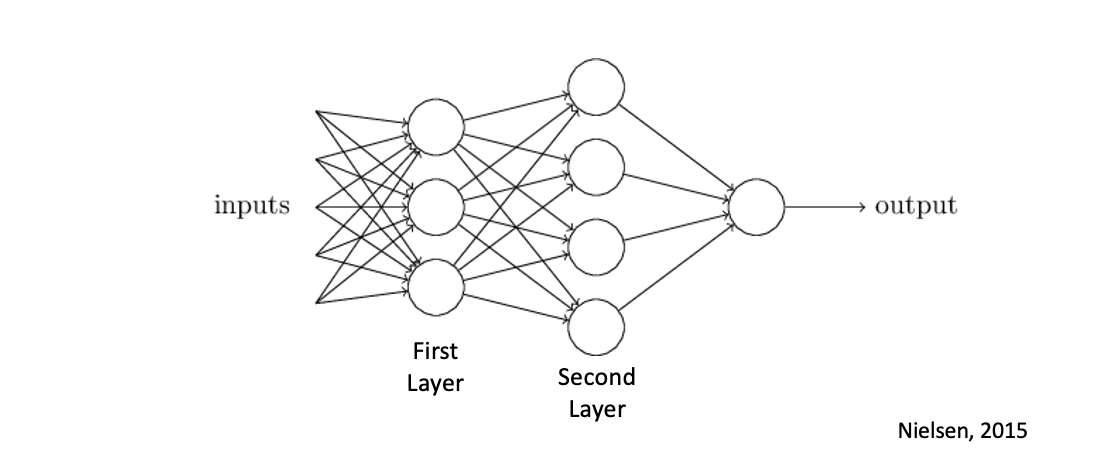

## bias

- bias is a measure of ease in firing the perceptron


- for MLP, threshold is replaced with bias $b$

$$
b = - \text{threshold}
\\
\text{output}  = \left\{\begin{matrix}
0 &  \textbf{w}\textbf{x}+b \leq 0 \\
1 &  \textbf{w}\textbf{x}+b > 0 \\
\end{matrix}\right.
$$

## how can we make any logic function with perceptron?

- because a NAND gate is universal for logic, 

    any logic can be built from chains of NAND gates

    so perceptrons are universal for logic


    
    | input      | output |
    | ----------- | ----------- |
    | 00      | 1       |
    | 01 or 10   | 1        |
    | 11  | 0        |

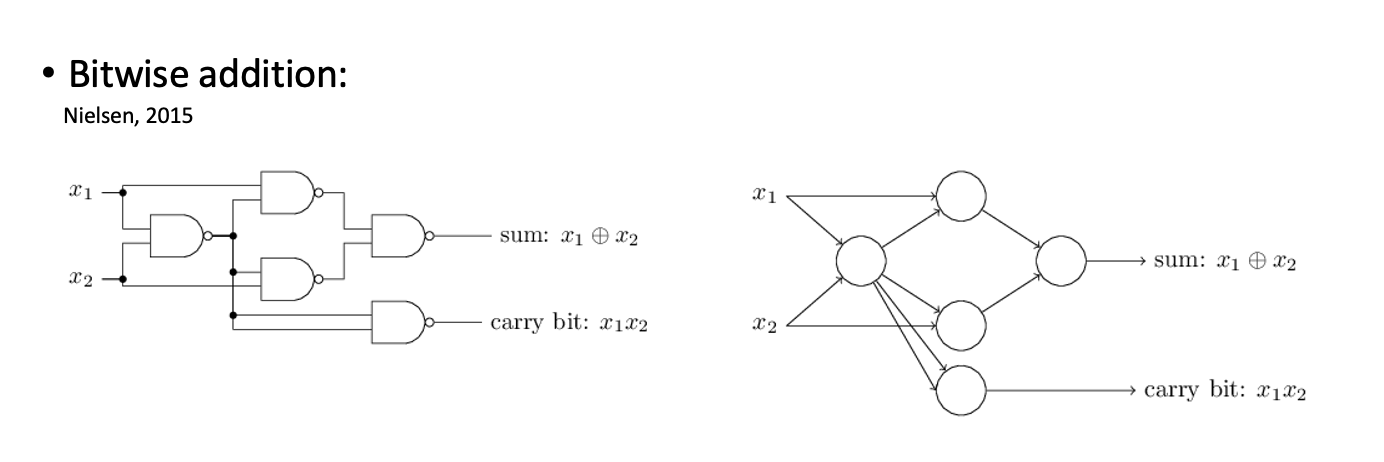

## problem with perceptron 

- hard to tune : small change in weight can lead to **large/no** changes in output

- modern NN don't have perceptrons or logical behavior,

    instead have **continuous differentiable activation** function such as sigmoid

    ad: small change in any weight (or bias) causes a **small** change in the output

## sigmoid neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Activation function')

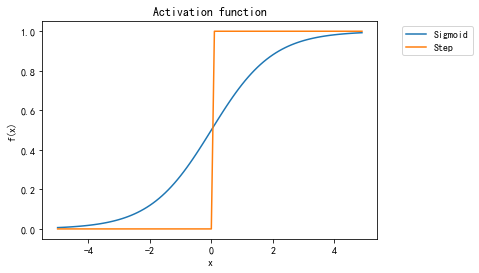

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)

plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, np.where(x<0, 0, 1), label='Step')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel("x")
plt.ylabel("f(x)")

plt.title("Activation function")

$$
\sigma(z) = \frac{1}{1+ e^{-z}} \in (0, 1)
$$

- derivative of sigmoidal function

$$
\frac{\partial \sigma(z)}{\partial z}=\sigma(z) [1- \sigma(z)]
$$

- a sigmoid neuron is a continuous version of perceptron,
    
- sigmoid function still looks like a step, but don't have hard threshold 0

    it gives intermediate value between 0 and 1


- smoothness of sigmoid function 

    $\Rightarrow$ small changes to weights and biases $\Rightarrow$ small changes in output
    

- smoothness and ease of differentiability of sigmoid function give **tunability**,

    we can change multiple sigmoids on neuron and learn by gradient descent

# forward propagation

- forward propagation is how NN propagates signals to compute outputs

    matrix computation is fast

- matrix notation of activation computation provides a global view of layer-layer relationship

    Apply weight matrix to activations, add bias vector, then apply activation function

$$
z^l = w^l a^{l-1} + b^l
\\[1em]
a^l = \sigma(z^l)
$$

- vector notation of activation computation provides a local view of neuron-neuron relationship

activation $a_j^l$ of jth neuron on the lth layer is related to the activations in the $l-1$ th layer

$$
a_j^l = \sigma (\sum _k w_{jk}^l a_k^{l-1} + b_j^l )
$$

where $\sigma$ is a non-linear activation function

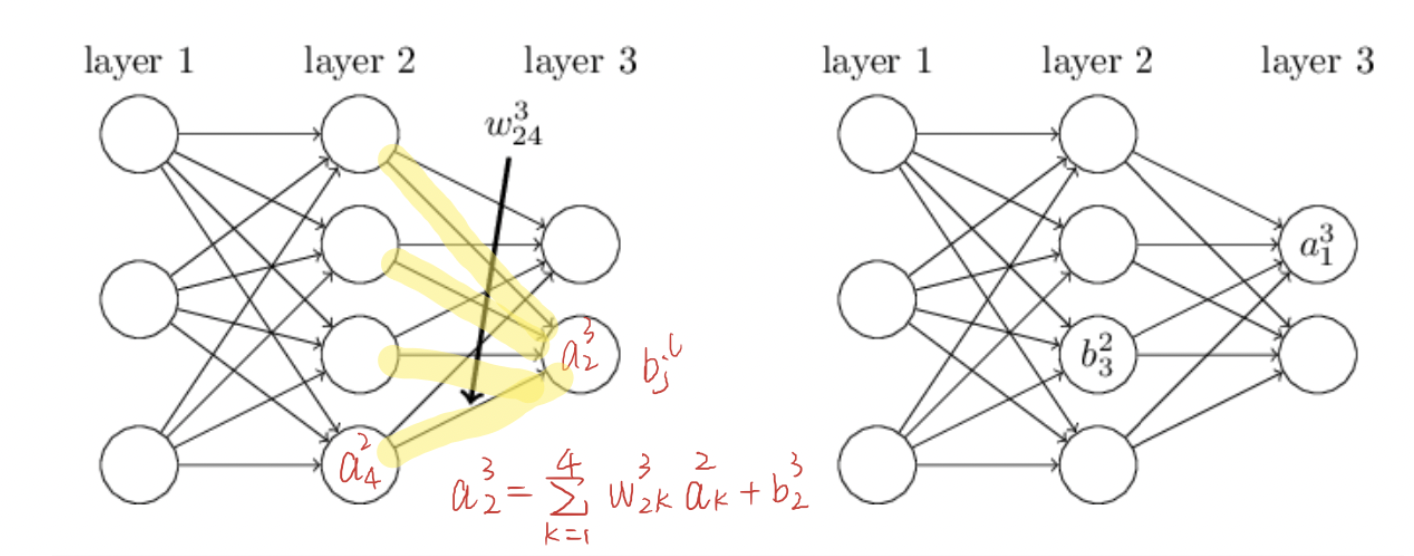